## Liberaries

In [87]:
# import main liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import os
import warnings
warnings.filterwarnings("ignore")


# preproccessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, RandomizedSearchCV

# models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb


# deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# metrics
from sklearn.metrics import mean_squared_error

## The Data

In [2]:
# read the Data
file_path = r"D:\2-Machine Learning\Dataset For Machine Learning\Regression\boston.csv"

# Read the csv file if is founded

if os.path.exists(file_path):
    
    df = pd.read_csv(file_path)
    print(df.head())
    
else:
    print("The File does not exist.")
    

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
# show the head of the data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# show some statestcis
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## the features describtion

###`*CRIM: Per capita crime rate by town.`

###`*ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.`

###`*INDUS: Proportion of non-retail business acres per town.`

###`*CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).`

###`*NOX: Nitric oxides concentration (parts per 10 million).`

###`*RM: Average number of rooms per dwelling.`

###`*AGE: Proportion of owner-occupied units built prior to 1940`.

###`*DIS: Weighted distances to five Boston employment centers.`

###`*RAD: Index of accessibility to radial highways.`

###`*TAX: Full-value property tax rate per $10,000.`

###`*PTRATIO: Pupil-teacher ratio by town.`

###`*B: 1000(Bk - 0.63)^2 where Bk is the proportion of people of African American descent by town.`

###`*LSTAT: Percentage lower status of the population.`

###`*MEDV: Median value of owner-occupied homes in $1000s (the target variable for prediction).`

## exploratory data analysis

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
# check the nulls 
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
# check the duolicates
df.duplicated().sum()

0

In [9]:
# show the numeric cols and categorical cols
def check(df):
    
    numeric_cols = [col for col in df.columns if df[col].dtype != object]
    categorical_cols = [col for col in df.columns if df[col].dtype == object]
    
    if (numeric_cols) and (categorical_cols):
        print(f"the numeric columns is ==> {numeric_cols}")
        print(f"the categorical columns is ==> {categorical_cols}")
        
    elif categorical_cols:
        print(f"the categorical columns is ==> {categorical_cols}")
    
    else:
        print(f"the numeric columns is ==> {numeric_cols}")
        
check(df)


the numeric columns is ==> ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


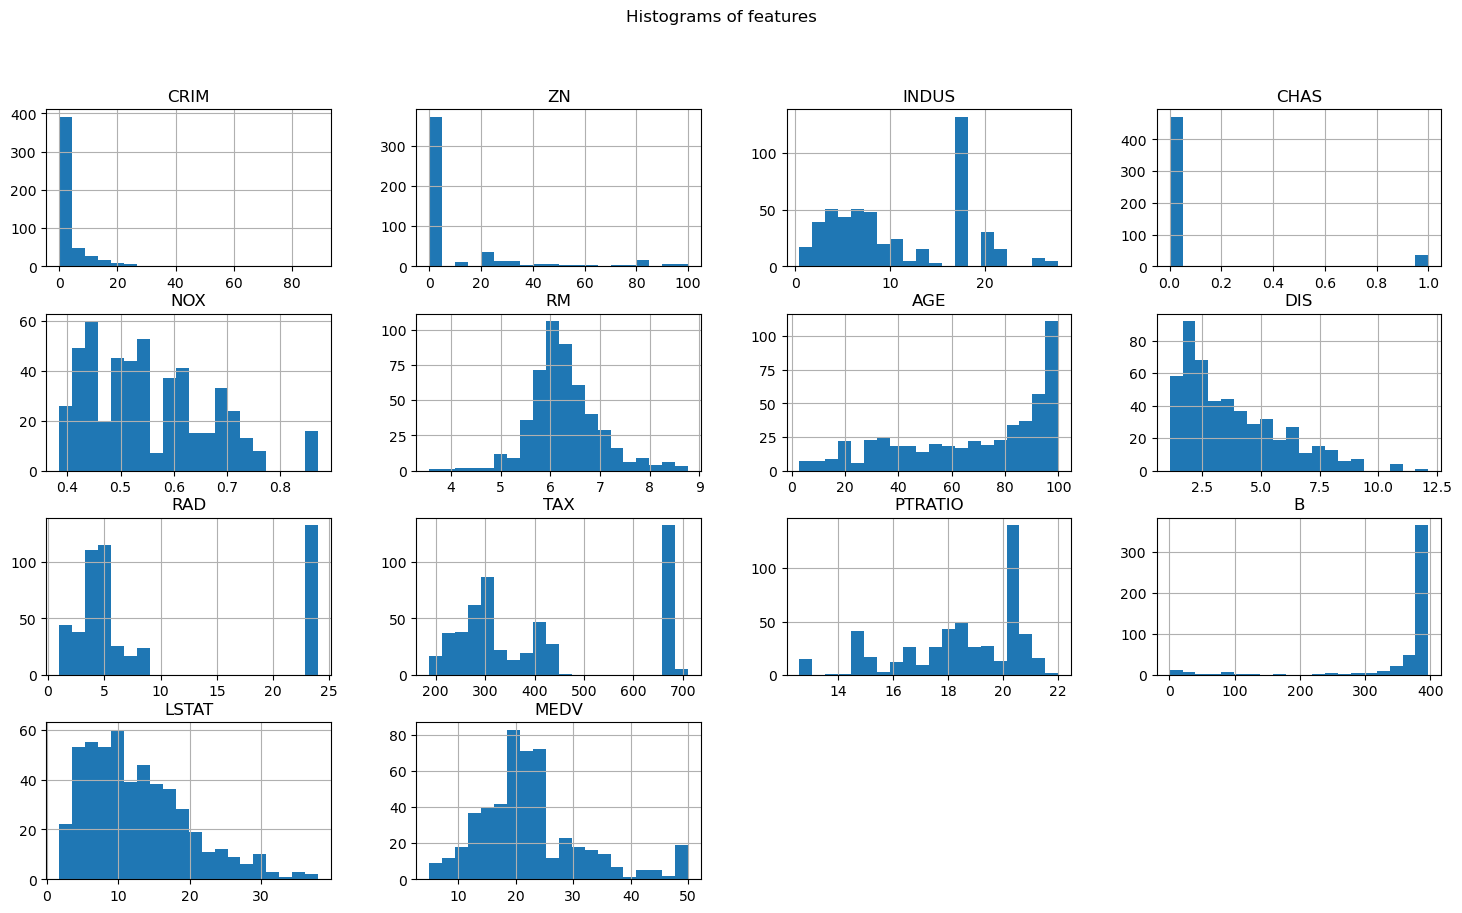

In [10]:
# Histograms for selected columns
df.hist(bins=20, figsize=(18, 10))
plt.suptitle('Histograms of features')
plt.show()

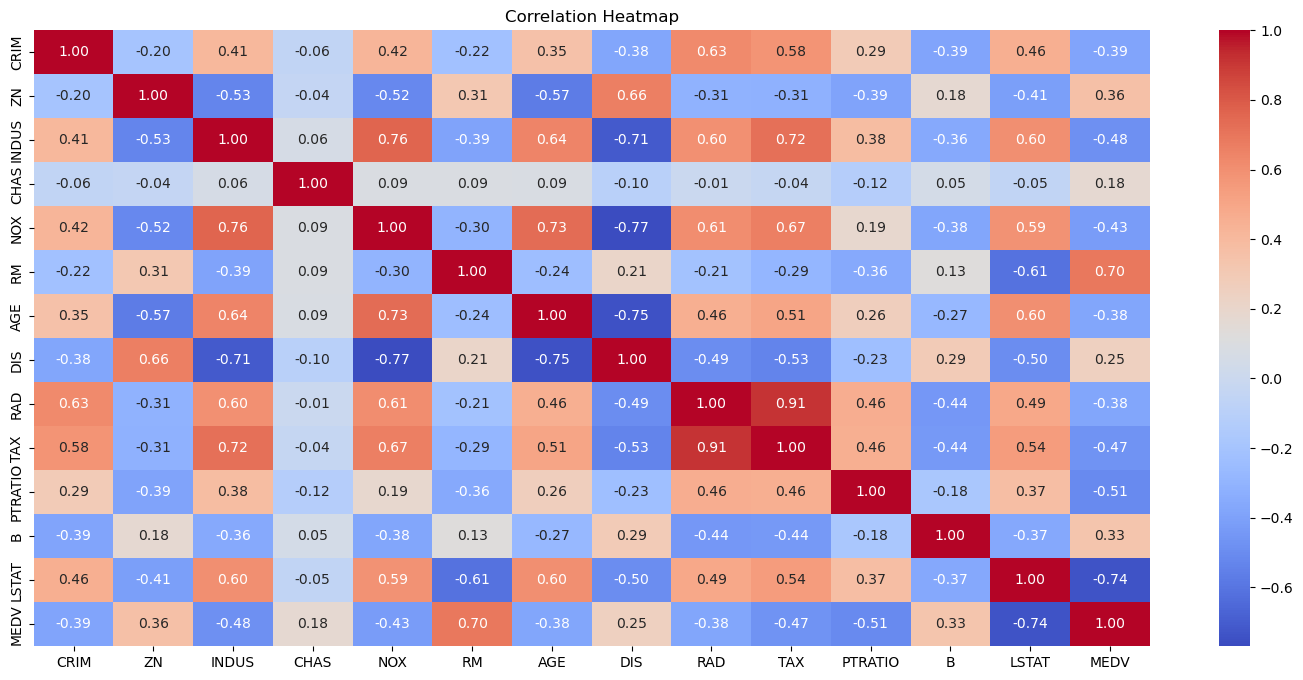

In [11]:
# Correlation heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

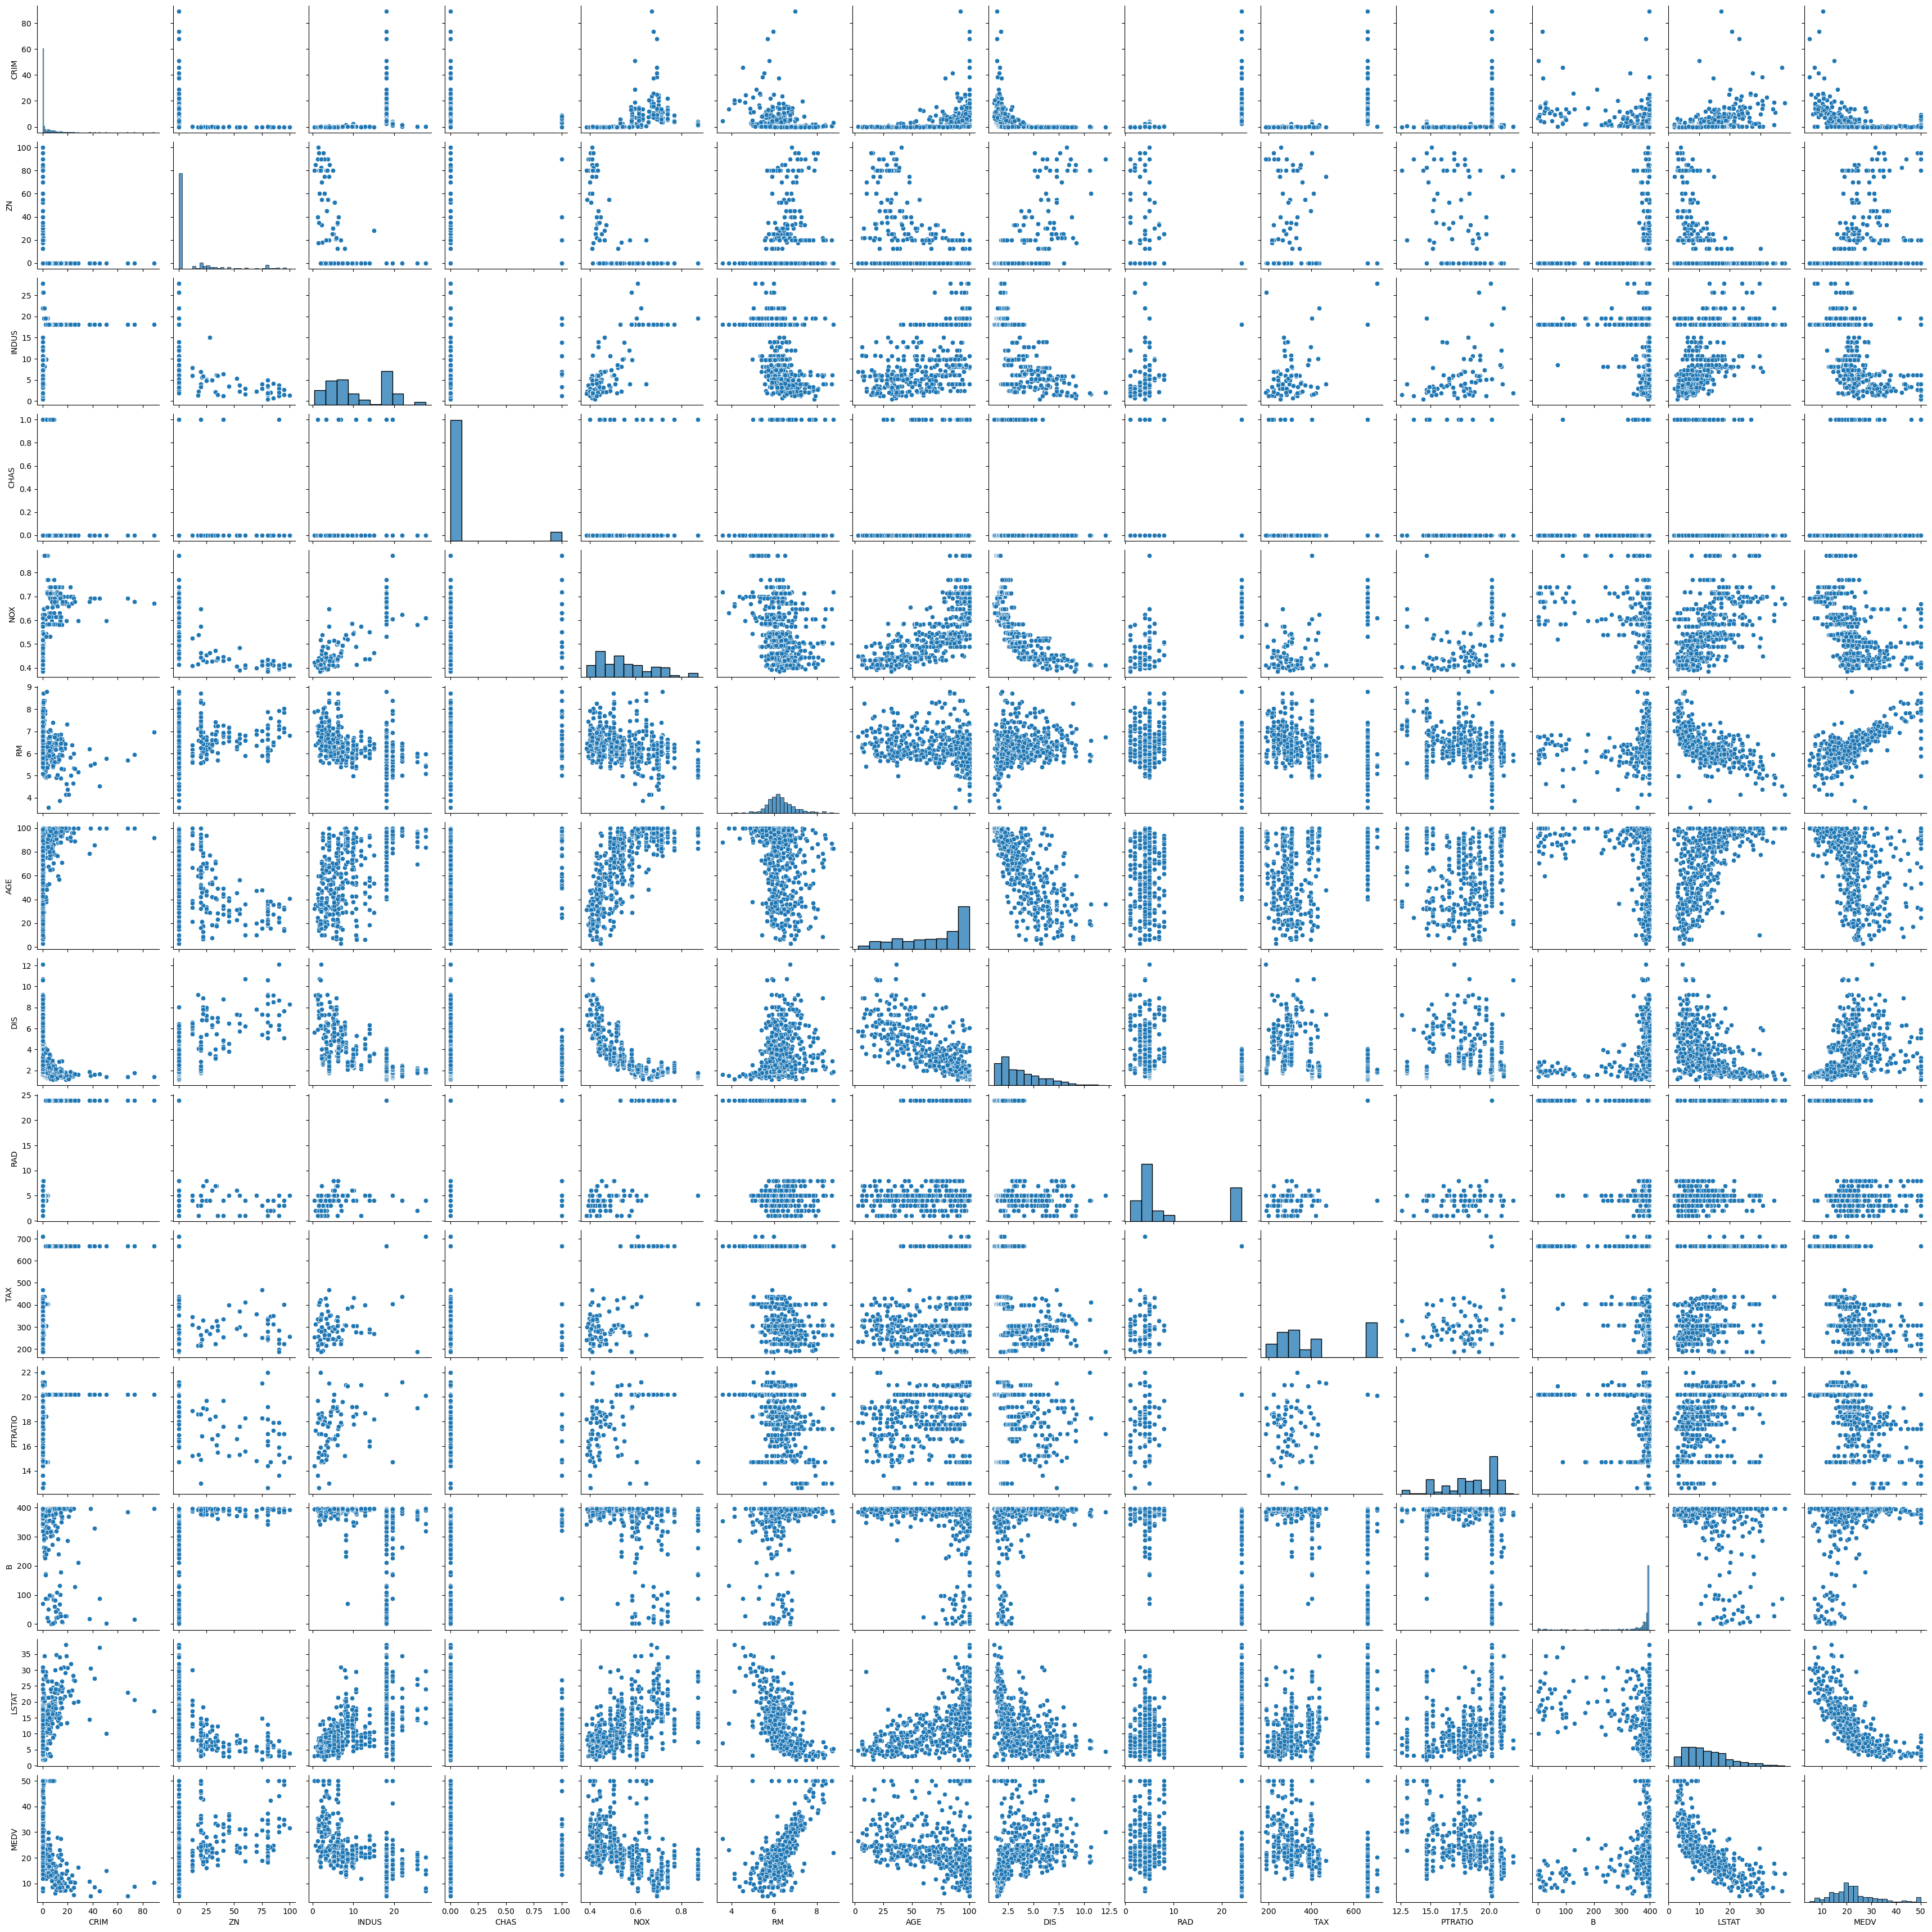

In [12]:
# Pairwise scatter plots 
sns.pairplot(df)
plt.show()

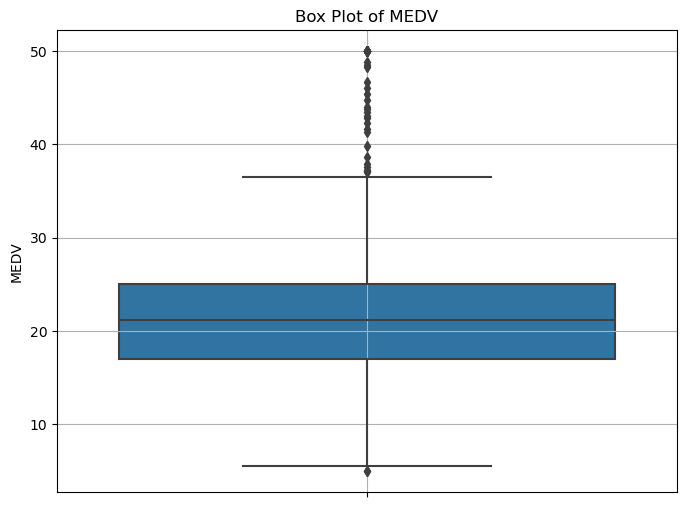

In [13]:
# Box plot for MEDV
plt.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=df)
plt.title('Box Plot of MEDV')
plt.grid()
plt.show()

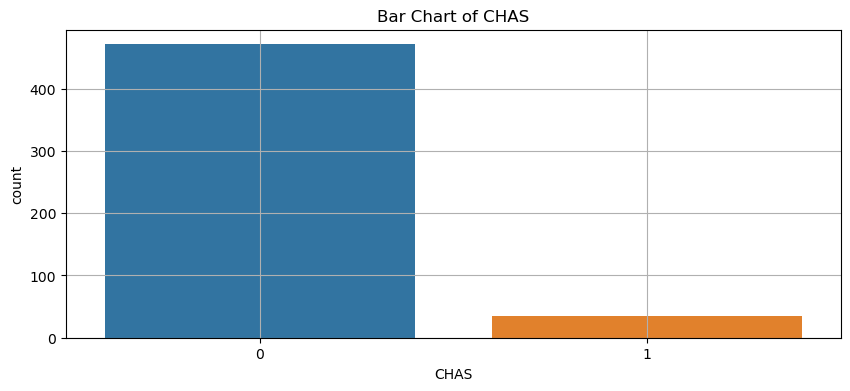

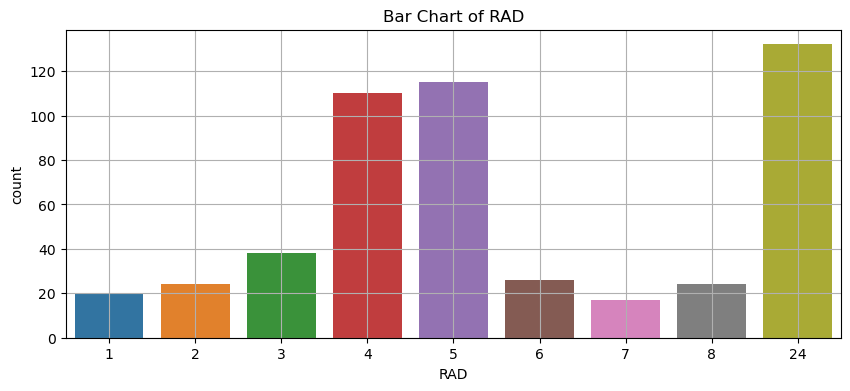

In [14]:
# Bar chart for  CHAS and RAD
columns = ['CHAS', 'RAD']
for col in columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Bar Chart of {col}')
    plt.grid(True)
    plt.show()

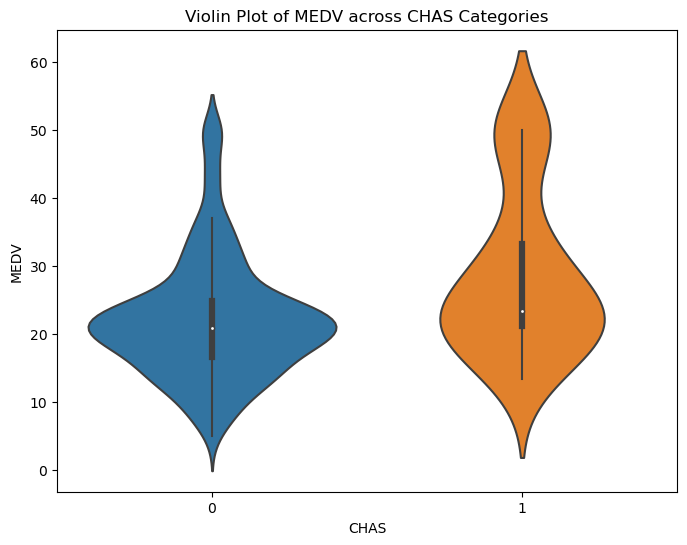

In [15]:
# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='CHAS', y='MEDV', data=df)
plt.title('Violin Plot of MEDV across CHAS Categories')
plt.show()

<Figure size 1000x1000 with 0 Axes>

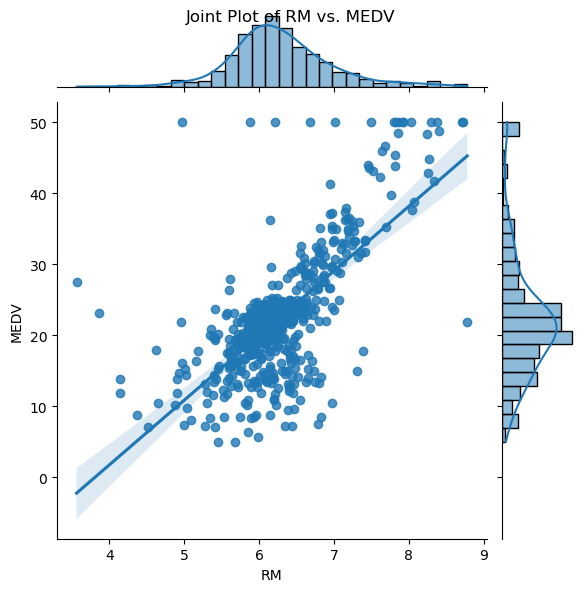

In [16]:
# Joint Plot (Regression Plot)
plt.figure(figsize=(10, 10))
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', )
plt.suptitle('Joint Plot of RM vs. MEDV')
plt.show()

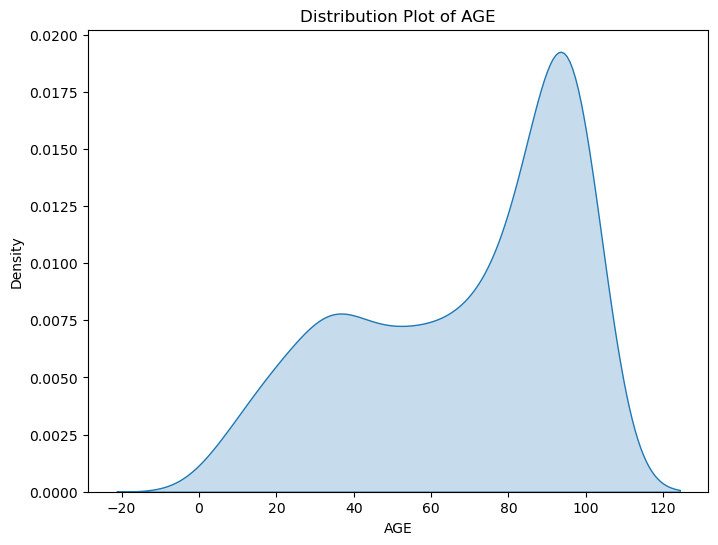

In [17]:
# Distribution Plot (KDE)
plt.figure(figsize=(8, 6))
sns.kdeplot(df['AGE'], shade=True)
plt.title('Distribution Plot of AGE')
plt.xlabel('AGE')
plt.show()


## Data Preprocessing

In [18]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


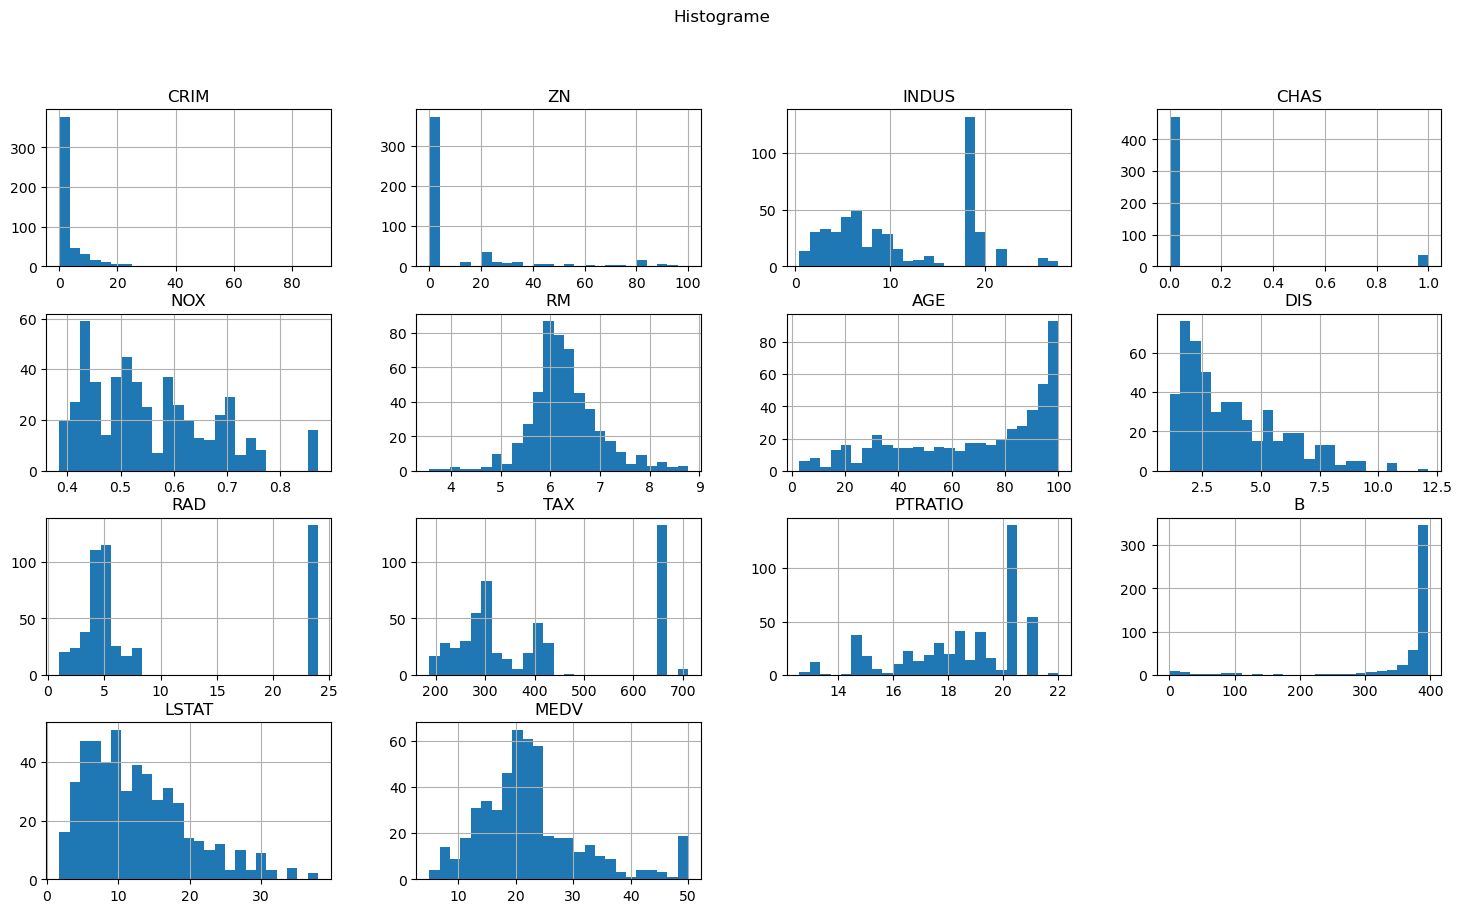

In [21]:
# histograme to show the skewed data
df.hist(figsize=(18, 10), bins=25)
plt.suptitle("Histograme")
plt.show()

In [22]:
# Solve the skewed data
skewed = ["AGE", "DIS", "CRIM", "LSTAT", "B"]
for col in skewed:
    df[col] = np.log(df[col] + 1e-10)

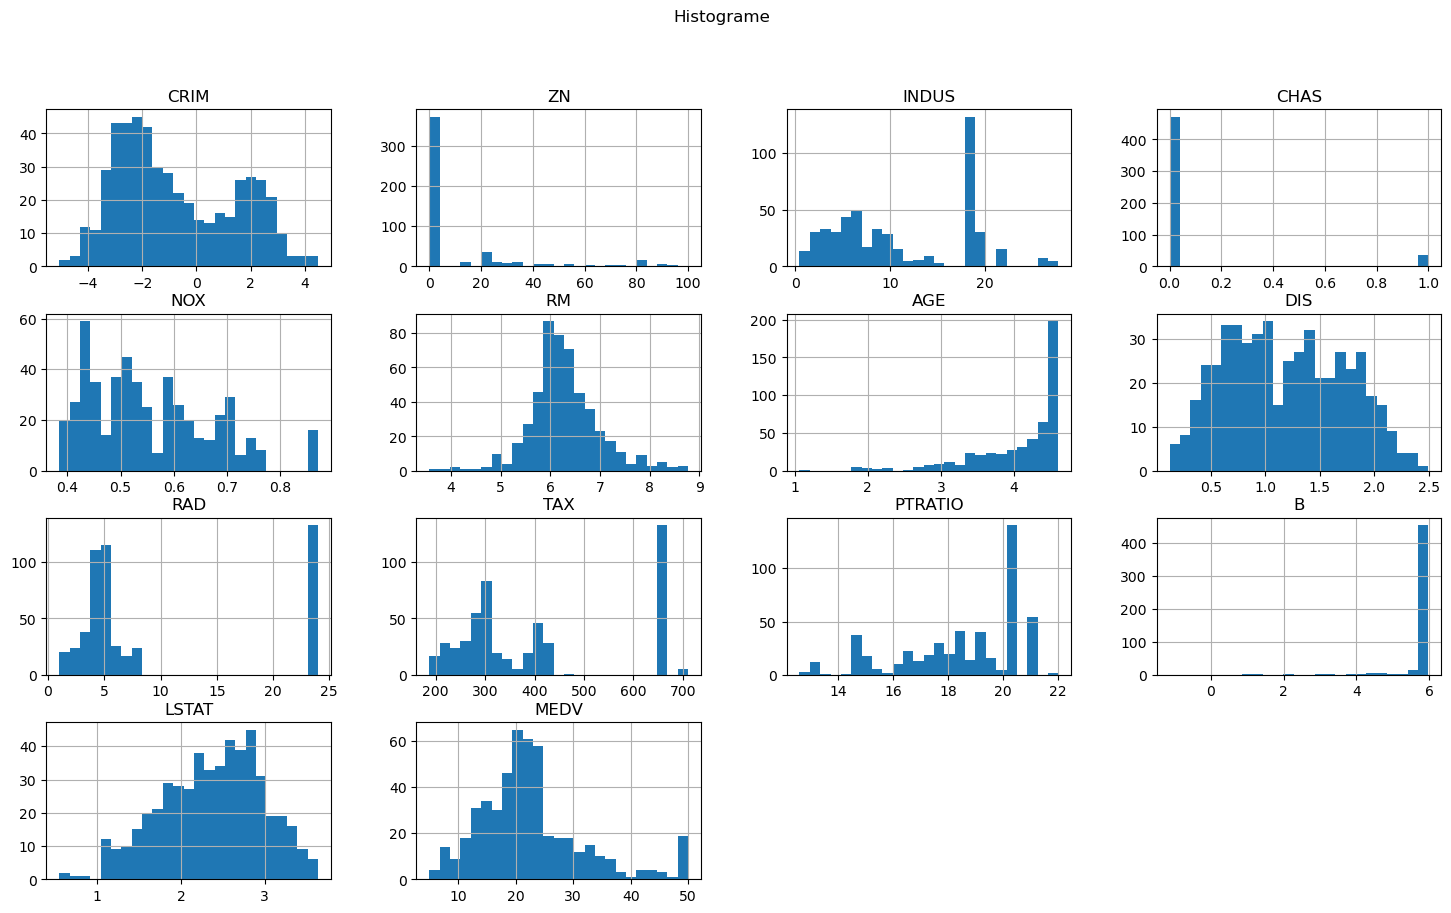

In [23]:
# histograme to show the skewed data
df.hist(figsize=(18, 10), bins=25)
plt.suptitle("Histograme")
plt.show()

In [25]:
# check the nulls 
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [26]:
# split to X_features and target
X = df.drop(columns=["MEDV"], axis=1) # features
y = df["MEDV"]

### `pipeline`

In [27]:
# the type of columns
numeric_cols = [col for col in X.columns if df[col].dtype != object]
categorical_cols = [col for col in X.columns if df[col].dtype == object]

In [28]:
# numerical pipeline to solve the nan and make Standardization
num_pipeline = Pipeline(steps=[
                            ("selector", DataFrameSelector(numeric_cols)), # ==> To select the numeric cols from the Data
                            ("Imputer", SimpleImputer(strategy="median") ),
                            ("Scaler", StandardScaler())
                                ])


# categorical pipeline 
cate_pipeline = Pipeline(steps=[
                 ("selector", DataFrameSelector(categorical_cols)),# ==> To select the categorical cols from the Data
                 ("Imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                 ("one_hot", LabelEncoder())
                ])

In [29]:
def Preprocessing(numeric_cols, categorical_cols, X):
    if numeric_cols and categorical_cols:
        # total pipeline to concatenate the num_pipeline and cate_pipeline
        total_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                                        ("cate_pipeline", cate_pipeline)])

        # make fitting
        num_pipeline.fit(X)
        X_final= num_pipeline.transform(X)

        return X_final

    elif categorical_cols == [] and numeric_cols:
        # make fitting
        num_pipeline.fit(X)
        X_final = num_pipeline.transform(X)

        return X_final

    else:
        # make fitting
        cate_pipeline.fit()
        X_final = cate_pipeline.transform(X)

        return X_final



X_final = Preprocessing(numeric_cols, categorical_cols, X)
print(f"X_final is = {X_final}")



X_final is = [[-1.98322811  0.28482986 -1.2879095  ... -1.45900038  0.3025923
  -1.27526026]
 [-1.30563885 -0.48772236 -0.59338101 ... -0.30309415  0.3025923
  -0.26371064]
 [-1.30597804 -0.48772236 -0.59338101 ... -0.30309415  0.28925293
  -1.62785808]
 ...
 [-0.93540227 -0.48772236  0.11573841 ...  1.17646583  0.3025923
  -1.06793936]
 [-0.662329   -0.48772236  0.11573841 ...  1.17646583  0.29129387
  -0.83665988]
 [-1.05026732 -0.48772236  0.11573841 ...  1.17646583  0.3025923
  -0.51080901]]


In [30]:
## convert X_final to dataframe
cols = X.columns
X_final = pd.DataFrame(X_final, columns=cols)
X_final

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-1.983228,0.284830,-1.287909,-0.272599,-0.144217,0.413672,0.142028,0.409104,-0.982843,-0.666608,-1.459000,0.302592,-1.275260
1,-1.305639,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.454617,0.769562,-0.867883,-0.987329,-0.303094,0.302592,-0.263711
2,-1.305978,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,0.035581,0.769562,-0.867883,-0.987329,-0.303094,0.289253,-1.627858
3,-1.226942,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.436818,1.139194,-0.752922,-1.106115,0.113032,0.295169,-2.153192
4,-0.876187,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.160820,1.139194,-0.752922,-1.106115,0.113032,0.302592,-1.162114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.921368,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.237245,-0.520096,-0.982843,-0.803212,1.176466,0.286483,-0.169811
502,-1.071652,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.408267,-0.668950,-0.982843,-0.803212,1.176466,0.302592,-0.274682
503,-0.935402,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.688463,-0.768920,-0.982843,-0.803212,1.176466,0.302592,-1.067939
504,-0.662329,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.657555,-0.588482,-0.982843,-0.803212,1.176466,0.291294,-0.836660


## the model

### `RandomForestRegressor`

In [41]:
# tunnig the hyperparameters
forest = RandomForestRegressor()

param = {
    "n_estimators" : [i for i in range(150, 300, 20)],
    "max_depth" : [i for i in range(5, 10, 3)],
    'criterion' :["squared_error", "absolute_error", "friedman_mse", "poisson"],
}

grid_search = GridSearchCV(estimator=forest, param_grid=param, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)

# fitting
grid_search.fit(X_final, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [5, 8],
                         'n_estimators': [150, 170, 190, 210, 230, 250, 270,
                                          290]},
             scoring='neg_mean_squared_error')

In [42]:
grid_search.best_params_

{'criterion': 'absolute_error', 'max_depth': 8, 'n_estimators': 270}

In [43]:
# the final model 
forest_reg = grid_search.best_estimator_

In [44]:
# make croos validation
croos_val = cross_val_score(estimator=forest_reg, X=X_final, y=y,
                            cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
# print the croos val for every fold
print(f"the scores is ==> {(croos_val)*-1}")

# show the mean for the scores
print(f"the mean to the scores is ==> {(croos_val.mean())*-1}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=forest_reg, X=X_final, y=y, 
                                   cv=5, method="predict", n_jobs=-1 )

# show the mean sqared error
print(f"the mean squared error is {mean_squared_error(y, croos_val_pred)}")

the scores is ==> [ 7.94837249 13.58209575 16.95371948 47.63084989 17.66578779]
the mean to the scores is ==> 20.756165077569605
****************************************************************************************************
the mean squared error is 21.067486123784835


In [45]:
# show the feature importance 
importance = forest_reg.feature_importances_
importance

array([0.07905779, 0.00271745, 0.0126818 , 0.00321712, 0.03587522,
       0.3966371 , 0.02918174, 0.06047101, 0.0068547 , 0.02306842,
       0.02962453, 0.02611027, 0.29450284])

In [46]:
# get the columns
columns = [col for col in X.columns]
columns

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

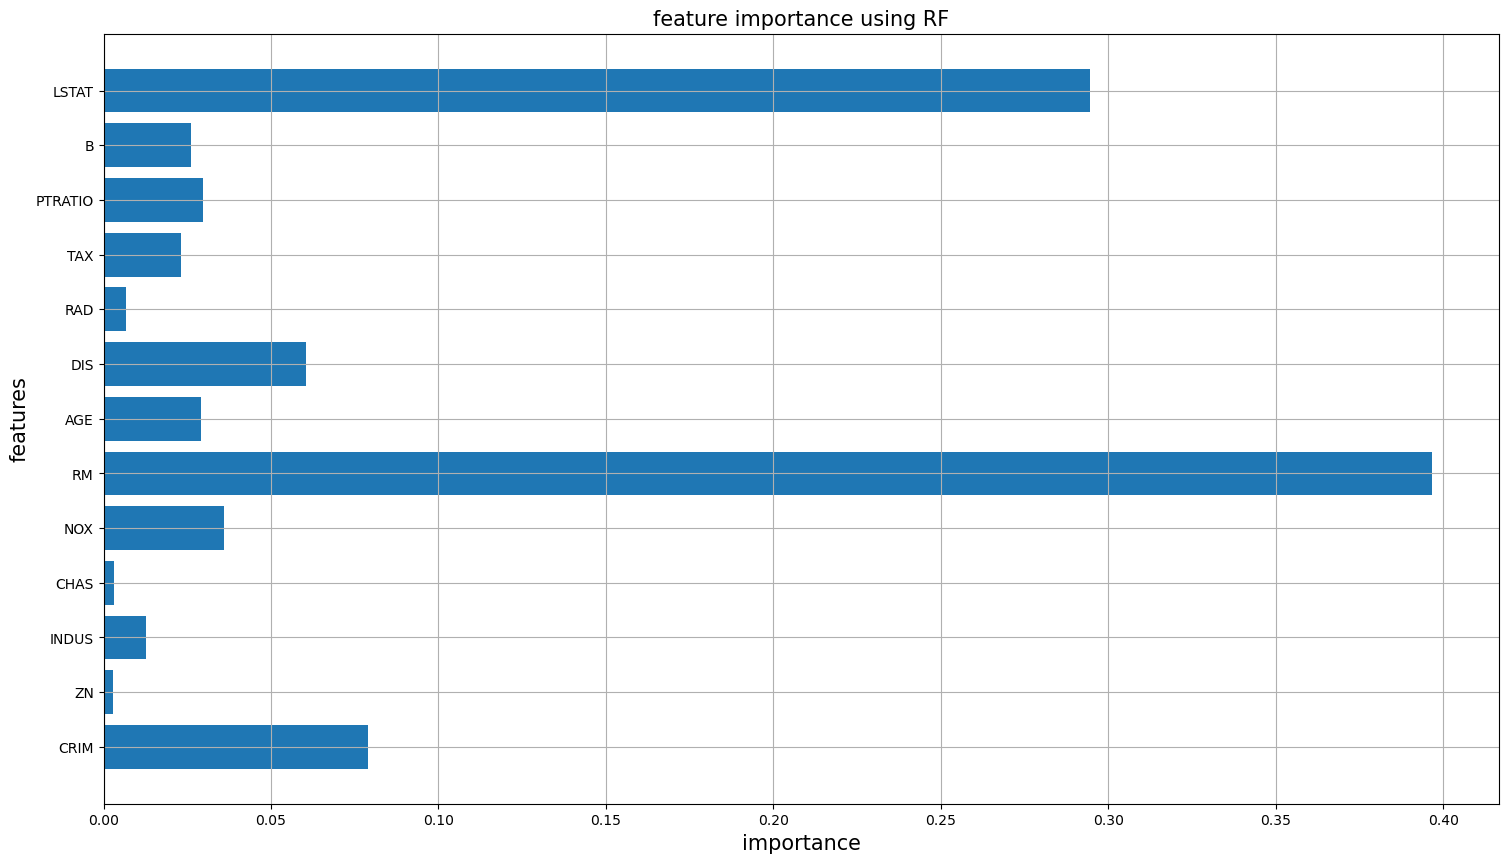

In [47]:
# show the feature importance with RF
plt.figure(figsize=(18, 10))
plt.barh(y=columns, width=importance, data=X)
plt.title("feature importance using RF", color="k", fontsize=15)
plt.xlabel("importance", color="k", fontsize=15)
plt.ylabel("features", color="k", fontsize=15)
plt.grid(True)
plt.show()

In [48]:
# prediction
y_pred_RF = forest_reg.predict(X_final)

In [49]:
pd.DataFrame(np.c_[y_pred_RF, y], columns=["prediction", "Actual"])

,prediction,Actual
0,25.468519,24.0
1,22.621111,21.6
2,34.409444,34.7
3,34.286481,33.4
4,35.031111,36.2
...,...,...
501,22.861481,22.4
502,20.887407,20.6
503,26.458333,23.9
504,24.242778,22.0


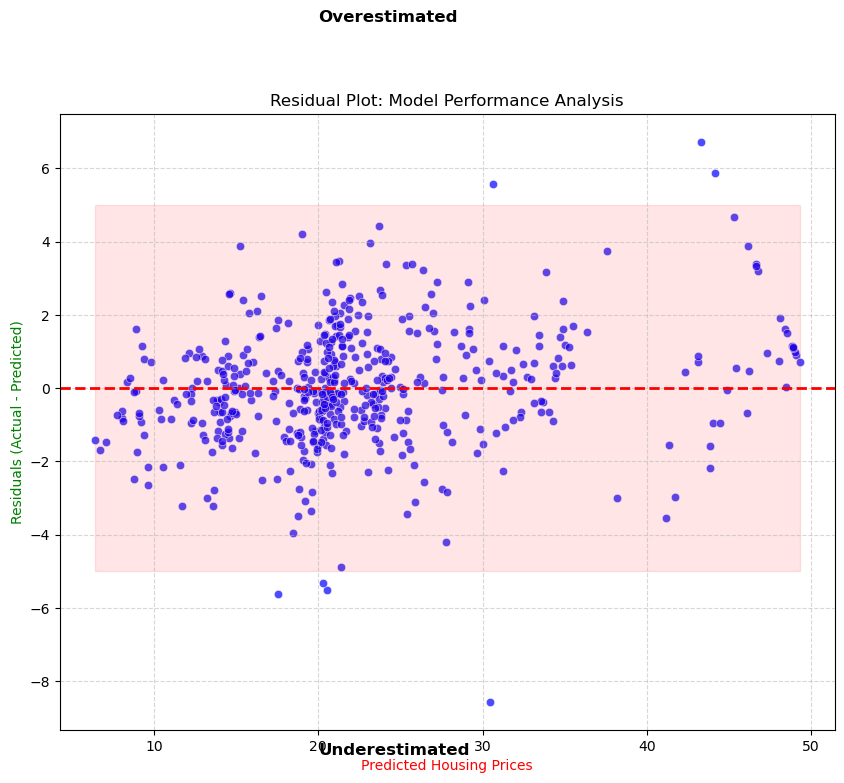

In [78]:
# Calculate residuals
residuals = y - y_pred_RF

# Residual Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred_RF, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Labels and annotations
plt.title('Residual Plot: Model Performance Analysis')
plt.xlabel('Predicted Housing Prices', color="r")
plt.ylabel('Residuals (Actual - Predicted)',color="g")
plt.text(20, 10, 'Overestimated', color='black', fontsize=12, fontweight='bold')
plt.text(20, -10, 'Underestimated', color='black', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

# Highlighting the zero residual line
plt.fill_between([min(y_pred_RF), max(y_pred_RF)], 5, -5, color='red', alpha=0.1)

plt.show()


### `AdaBoostClassifier`

In [50]:
# tunnig the hyperparameters for DT

Dt = DecisionTreeRegressor()

param = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
         "splitter" : ["best", "random"],
          "max_depth": np.arange(2, 20, 1),
         "min_samples_split": np.arange(2, 5, 1)}


DT_grid = GridSearchCV(estimator=Dt, param_grid=param, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")

# fitting
DT_grid.fit(X_final, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_samples_split': array([2, 3, 4]),
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [51]:
# show the best parameters
DT_grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 6,
 'min_samples_split': 3,
 'splitter': 'random'}

In [52]:
# make the model 
DT_model = DT_grid.best_estimator_

In [53]:
# make croos validation
croos_val = cross_val_score(estimator=DT_model, X=X_final, y=y,
                            cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
# print the croos val for every fold
print(f"the scores is ==> {(croos_val)*-1}")

# show the mean for the scores
print(f"the mean to the scores is ==> {(croos_val.mean())*-1}")

the scores is ==> [ 8.06599405 31.93087619 46.78022697 37.51666654 37.23158744]
the mean to the scores is ==> 32.30507023583902


In [55]:
# tunning the hyperparameters to AdaBoostClassifier model
AdaBoostreg = AdaBoostRegressor()

param = {
    "n_estimators" : np.arange(10, 100, 10),
    "learning_rate" : np.arange(0.1, 1, 0.2)
}

AdaBoostreg_grid = GridSearchCV(estimator=AdaBoostreg, param_grid=param, scoring="neg_mean_squared_error", n_jobs=-1, cv=5)
# fitting 

AdaBoostreg_grid.fit(X_final, y)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='neg_mean_squared_error')

In [56]:
# show the best params
AdaBoostreg_grid.best_params_

{'learning_rate': 0.9000000000000001, 'n_estimators': 90}

In [57]:
# the final model 
AdaBoostreg_final = AdaBoostreg_grid.best_estimator_

In [58]:
# make croos validation
croos_val = cross_val_score(estimator=AdaBoostreg_final, X=X_final, y=y,
                            cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
# print the croos val for every fold
print(f"the scores is ==> {(croos_val)*-1}")

# show the mean for the scores
print(f"the mean to the scores is ==> {(croos_val.mean())*-1}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=AdaBoostreg_final, X=X_final, y=y, 
                                   cv=5, method="predict", n_jobs=-1 )


# show the mean sqared error
print(f"the mean squared error is {mean_squared_error(y, croos_val_pred)}")

the scores is ==> [ 9.25001151 10.80291217 30.2408949  44.09013752 18.81871652]
the mean to the scores is ==> 22.640534526592766
****************************************************************************************************
the mean squared error is 23.216062219973157


In [59]:
# show the feature importance 
importance = AdaBoostreg_final.feature_importances_
importance

array([0.03466545, 0.00060453, 0.00838366, 0.00117618, 0.05879639,
       0.22598199, 0.00488652, 0.12998284, 0.01734708, 0.03770464,
       0.05166855, 0.0214416 , 0.40736058])

In [60]:
# get the columns
columns = [col for col in X.columns]
columns

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

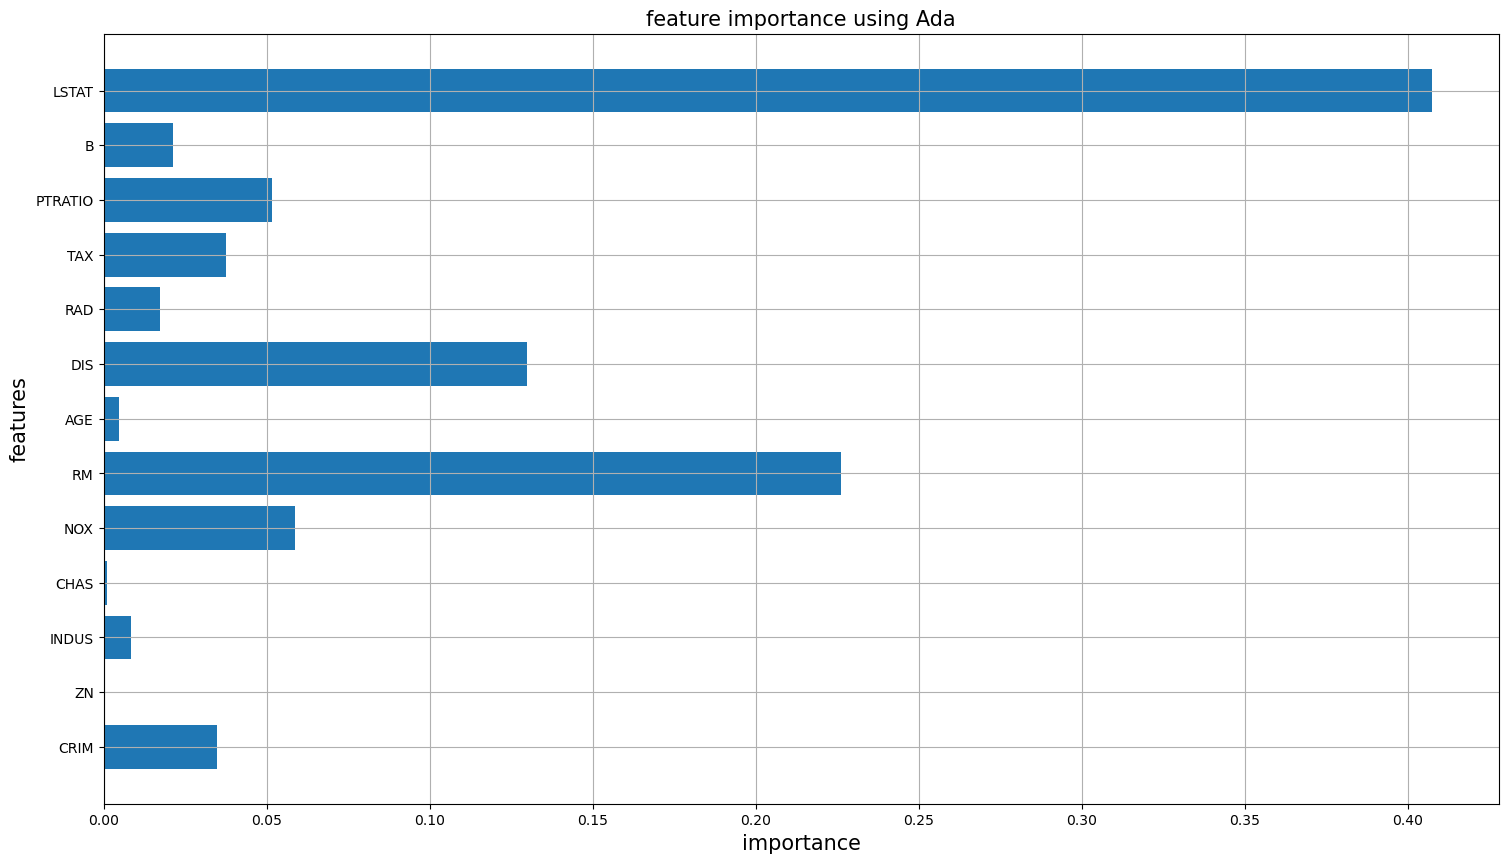

In [96]:
# show the feature importance with Ada
plt.figure(figsize=(18, 10))
plt.barh(y=columns, width=importance, data=X)
plt.title("feature importance using Ada", color="k", fontsize=15)
plt.xlabel("importance", color="k", fontsize=15)
plt.ylabel("features", color="k", fontsize=15)
plt.grid(True)
plt.show()

In [62]:
# prediction
y_pred_ِAda = AdaBoostreg_final.predict(X_final)

In [63]:
pd.DataFrame(np.c_[y_pred_ِAda, y], columns=["prediction", "Actual"])

,prediction,Actual
0,25.744737,24.0
1,25.713115,21.6
2,34.810811,34.7
3,33.122400,33.4
4,32.492941,36.2
...,...,...
501,21.928571,22.4
502,17.872642,20.6
503,26.196000,23.9
504,25.713115,22.0


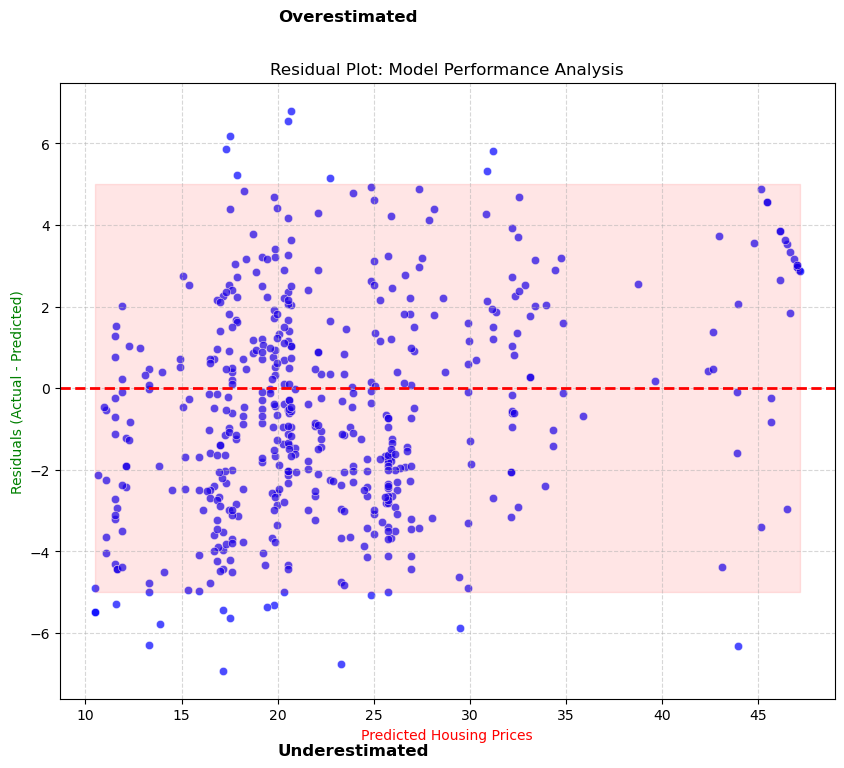

In [82]:
# Calculate residuals
residuals = y - y_pred_ِAda

# Residual Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred_ِAda, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Labels and annotations
plt.title('Residual Plot: Model Performance Analysis')
plt.xlabel('Predicted Housing Prices', color="r")
plt.ylabel('Residuals (Actual - Predicted)',color="g")
plt.text(20, 9, 'Overestimated', color='black', fontsize=12, fontweight='bold')
plt.text(20, -9, 'Underestimated', color='black', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

# Highlighting the zero residual line
plt.fill_between([min(y_pred_ِAda), max(y_pred_ِAda)], 5, -5, color='red', alpha=0.1)

plt.show()


### `XGBoost`

In [64]:
# tunnig the hyperparameters for DT
Xgb_reg= xgb.XGBRegressor()

params = {
    "n_estimators" : np.arange(50, 200, 10),
    "max_depth" : np.arange(2, 10, 1),
    "learning_rate" : np.arange(0.1, 1, 0.1),
    "subsample" : np.arange(0.2, 1, 0.25),
    "alpha" :  np.arange(0.1, 1, 0.1)
}

Xgb_cls_grid = RandomizedSearchCV(estimator=Xgb_reg, param_distributions=params, n_jobs=-1,
                                  cv=5, scoring="neg_mean_squared_error", n_iter=500)


# fitting
Xgb_cls_grid.fit(X_final, y)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=None, ...),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190]),
                                        'subsample': array([0.2 , 0.45, 0.7 , 0.95])},
                   scoring='neg_mean_squared_error')

In [65]:
# show the best params
Xgb_cls_grid.best_params_

{'subsample': 0.7,
 'n_estimators': 130,
 'max_depth': 4,
 'learning_rate': 0.1,
 'alpha': 0.5}

In [66]:
# the final model
Xgb_reg_final = Xgb_cls_grid.best_estimator_

In [67]:
# make croos validation
croos_val = cross_val_score(estimator=Xgb_reg_final, X=X_final, y=y,
                            cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
# print the croos val for every fold
print(f"the scores is ==> {(croos_val)*-1}")

# show the mean for the scores
print(f"the mean to the scores is ==> {(croos_val.mean())*-1}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=Xgb_reg_final, X=X_final, y=y, 
                                   cv=5, method="predict", n_jobs=-1 )



# show the mean sqared error
print(f"the mean squared error is {mean_squared_error(y, croos_val_pred)}")

the scores is ==> [ 6.29657911 14.23353323 17.0986     39.65795417 14.21947974]
the mean to the scores is ==> 18.30122924990683
****************************************************************************************************
the mean squared error is 18.27750464489094


In [69]:
# prediction
y_pred_ِXGb = Xgb_reg_final.predict(X_final)

In [70]:
pd.DataFrame(np.c_[y_pred_ِXGb, y], columns=["prediction", "Actual"])

,prediction,Actual
0,24.246181,24.0
1,21.527454,21.6
2,34.142658,34.7
3,34.128315,33.4
4,35.217323,36.2
...,...,...
501,22.117546,22.4
502,19.136848,20.6
503,23.808275,23.9
504,22.768585,22.0


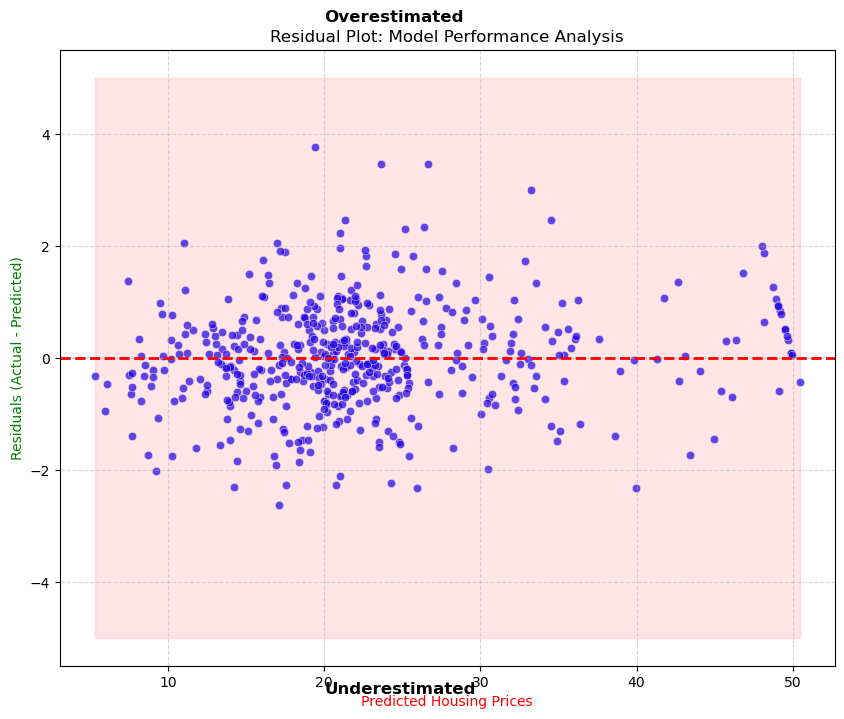

In [86]:
# Calculate residuals
residuals = y - y_pred_ِXGb

# Residual Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred_ِXGb, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Labels and annotations
plt.title('Residual Plot: Model Performance Analysis')
plt.xlabel('Predicted Housing Prices', color="r")
plt.ylabel('Residuals (Actual - Predicted)',color="g")
plt.text(20, 6, 'Overestimated', color='black', fontsize=12, fontweight='bold')
plt.text(20, -6, 'Underestimated', color='black', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

# Highlighting the zero residual line
plt.fill_between([min(y_pred_ِXGb), max(y_pred_ِXGb)], 5, -5, color='red', alpha=0.1)

plt.show()


### `Deep Learning model`

In [97]:
# Creating the neural network model with dropout and early stopping
model = Sequential()
model.add(Dense(64, input_shape=(X_final.shape[1],), activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(1)) 

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Adding early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Training the model
history = model.fit(X_final, y, epochs=100, batch_size=32, 
                    validation_data=(X_final, y), verbose=1, callbacks=[early_stop])


Epoch 1/100
16/16 [==============================] - 1s 17ms/step - loss: 571.7269 - mse: 571.7269 - val_loss: 544.2635 - val_mse: 544.2635
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 514.7452 - mse: 514.7452 - val_loss: 477.7479 - val_mse: 477.7479
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 440.3353 - mse: 440.3353 - val_loss: 387.4305 - val_mse: 387.4305
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 338.5967 - mse: 338.5967 - val_loss: 274.8534 - val_mse: 274.8534
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 229.1402 - mse: 229.1402 - val_loss: 165.4239 - val_mse: 165.4239
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 142.1238 - mse: 142.1238 - val_loss: 94.5921 - val_mse: 94.5921
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 88.4243 - mse: 88.4243 - val_loss: 66.4715 - val_mse: 66.4715
Epoch 8/100
16/16 [=============

In [98]:
# Evaluating the model
loss, mse = model.evaluate(X_final, y, verbose=0)
print(f"Mean Squared Error on Test Data: {mse}")

Mean Squared Error on Test Data: 9.795609474182129


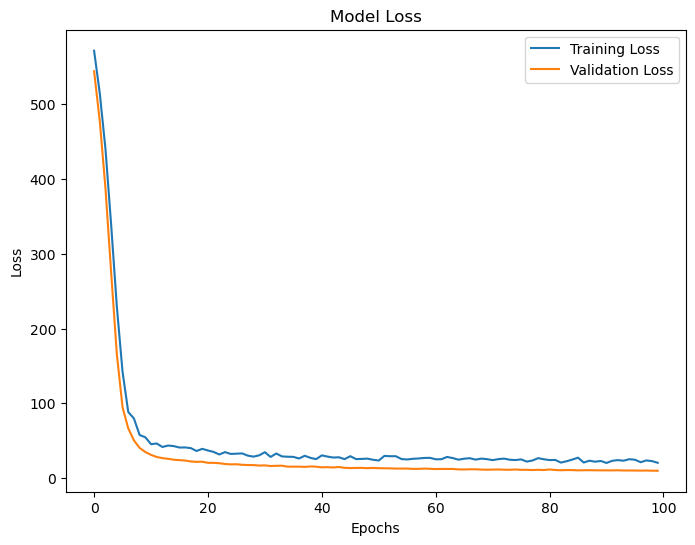

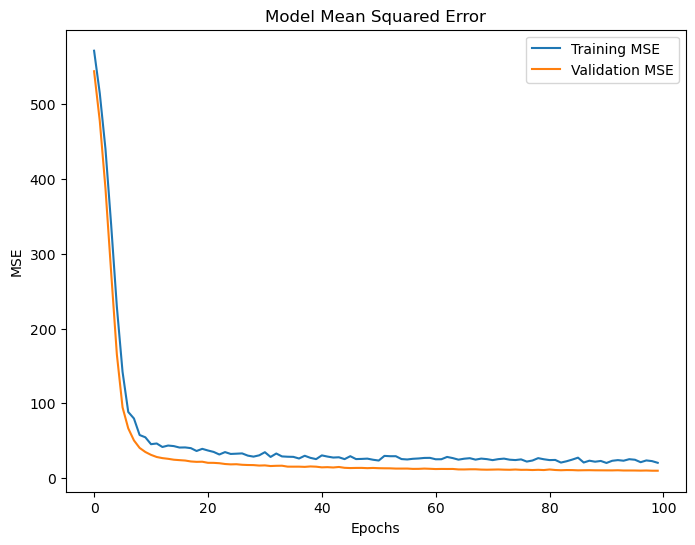

In [99]:
# Visualization: Plotting training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualization: Plotting training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

## `Thanks`

### `By: Mohammed Hamza`